In [30]:
%pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [32]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [33]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

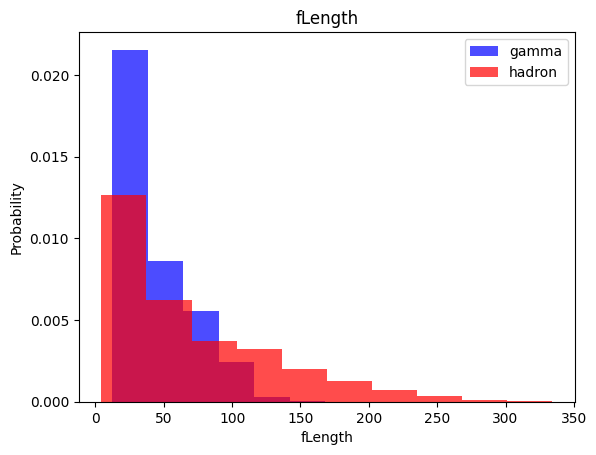

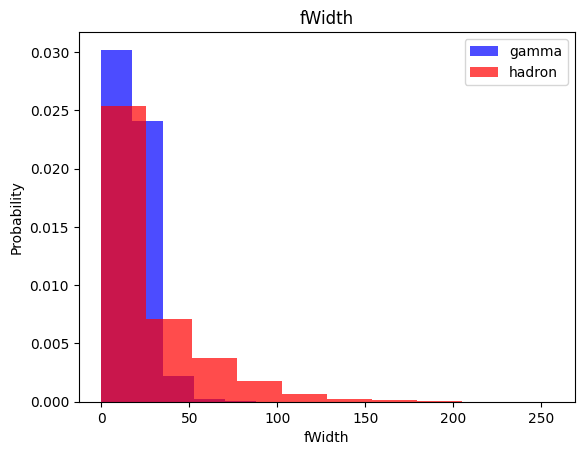

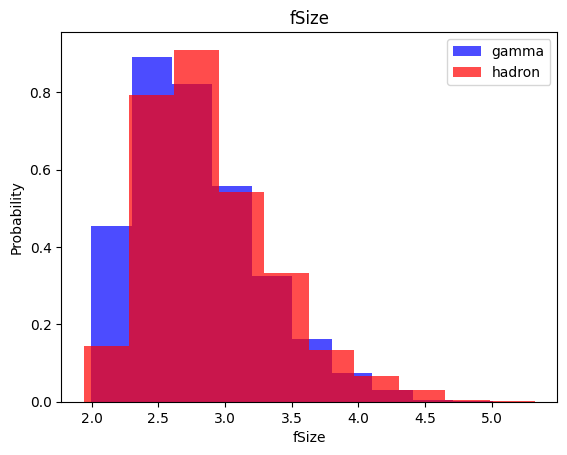

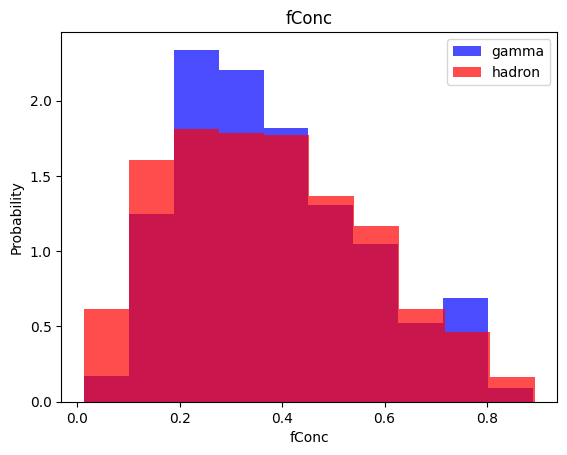

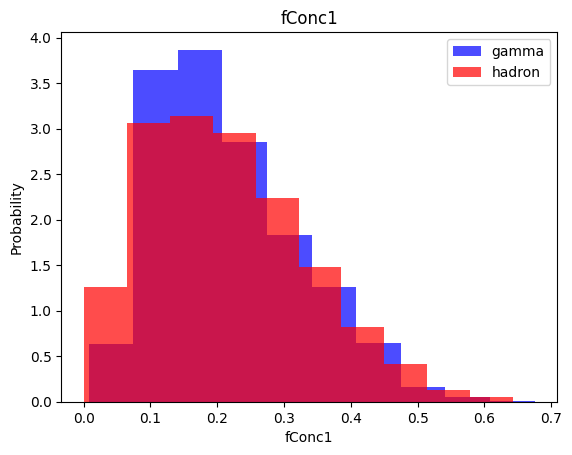

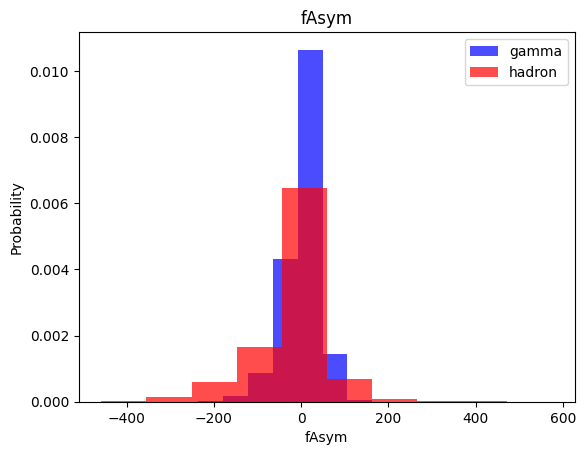

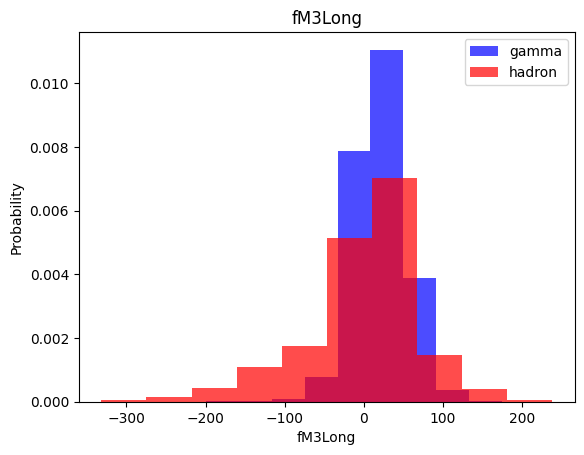

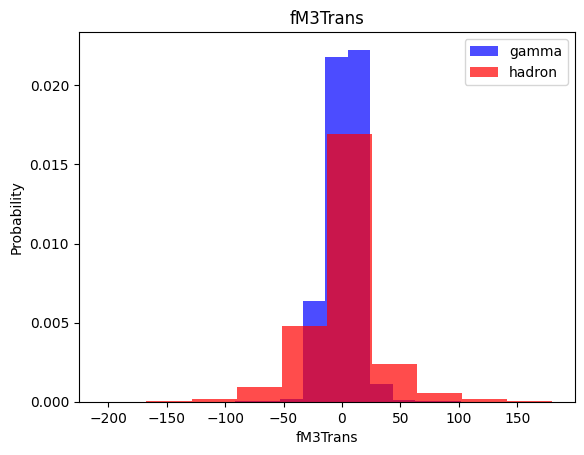

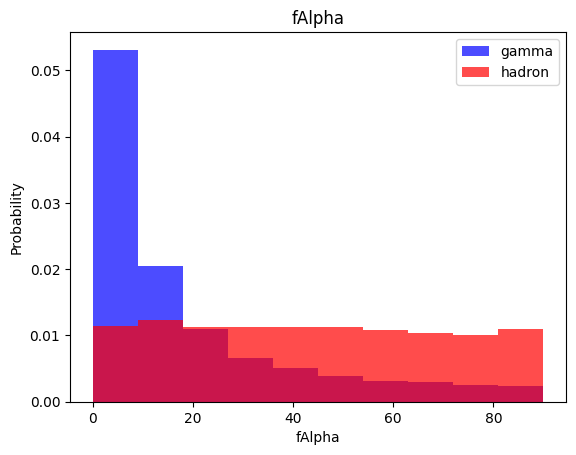

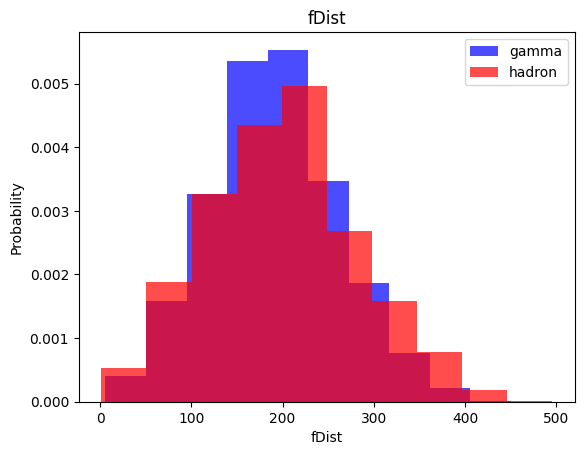

In [34]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets

In [35]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [36]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X,np.reshape(Y, (-1,1))))

  return data, X, Y


In [37]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0]))

7391
4021


In [38]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

# k-nearest neighbors (k-NN) algorithm

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [41]:
Y_pred = knn_model.predict(X_test)

In [42]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1370
           1       0.85      0.86      0.85      2434

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes classifier

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [45]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.40      0.52      1370
           1       0.73      0.91      0.81      2434

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,Y_train)

In [48]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1370
           1       0.84      0.82      0.83      2434

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



# Support vector machines (SVMs)

In [49]:
from sklearn.svm import SVC

In [50]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,Y_train)

In [51]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1370
           1       0.88      0.90      0.89      2434

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,Y_train)

In [54]:
Y_pred = tree_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1370
           1       0.85      0.86      0.85      2434

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Neural networks

In [55]:
import tensorflow as tf

In [56]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [59]:
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


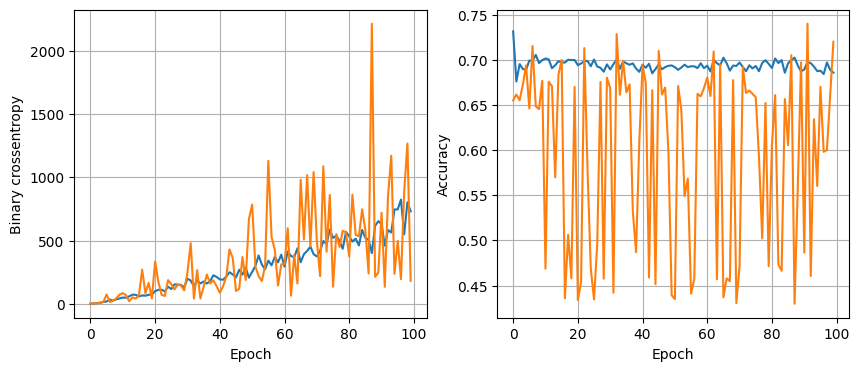

119/119 [==============================] - 0s 4ms/step - loss: 242.8649 - accuracy: 0.7479
16 nodes, dropout 0, lr 0.01, batch size 64


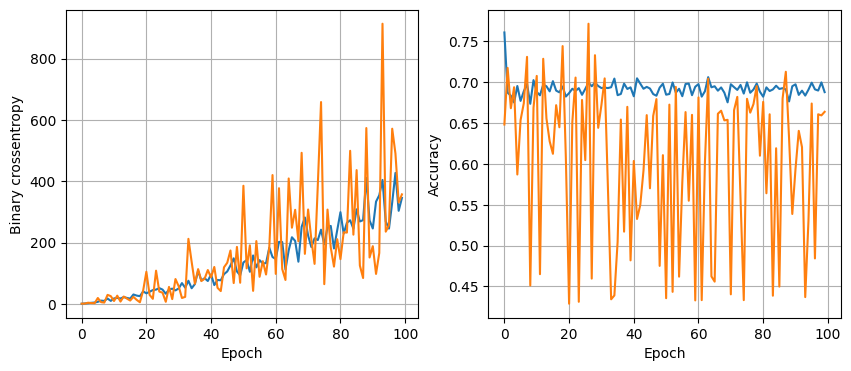

119/119 [==============================] - 0s 4ms/step - loss: 429.8128 - accuracy: 0.6822
16 nodes, dropout 0, lr 0.01, batch size 128


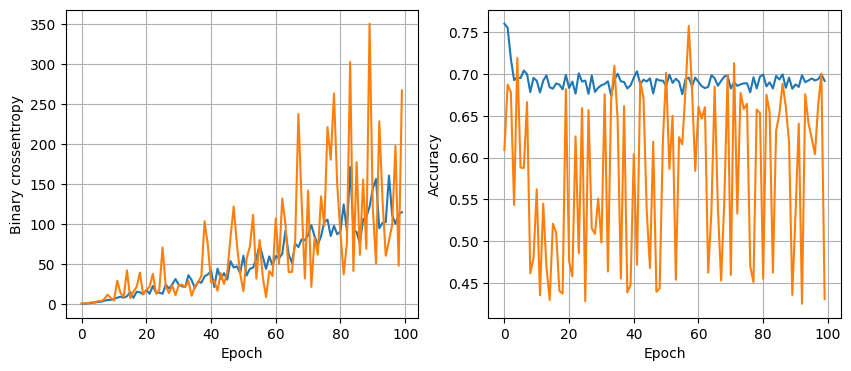

119/119 [==============================] - 1s 4ms/step - loss: 252.2649 - accuracy: 0.5334
16 nodes, dropout 0, lr 0.005, batch size 32


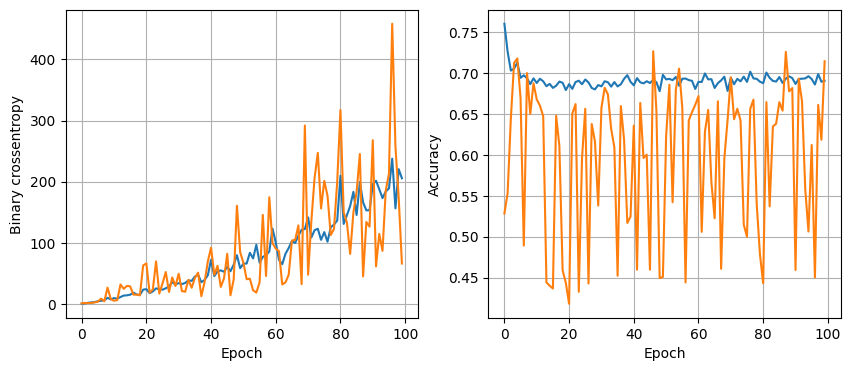

119/119 [==============================] - 0s 4ms/step - loss: 105.1800 - accuracy: 0.7093
16 nodes, dropout 0, lr 0.005, batch size 64


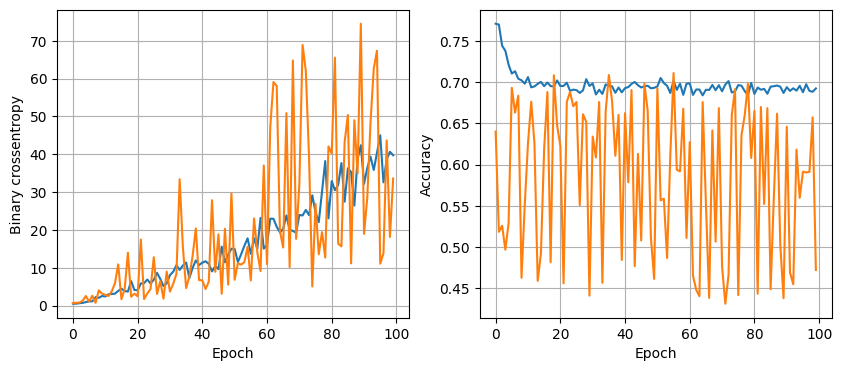

119/119 [==============================] - 0s 4ms/step - loss: 22.4084 - accuracy: 0.6496
16 nodes, dropout 0, lr 0.005, batch size 128


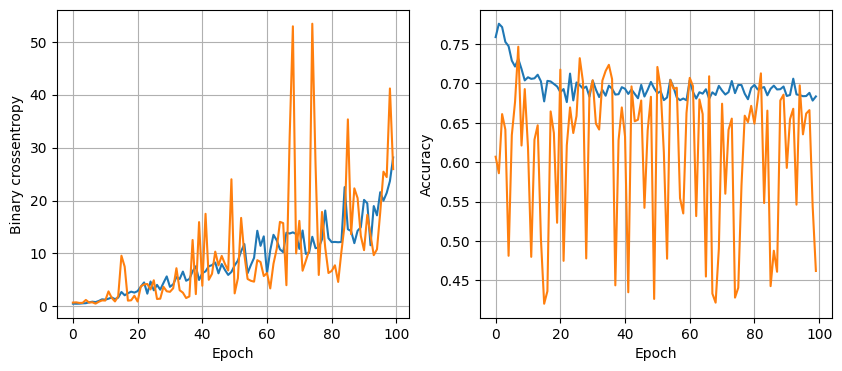

119/119 [==============================] - 1s 4ms/step - loss: 18.2046 - accuracy: 0.6354
16 nodes, dropout 0, lr 0.001, batch size 32


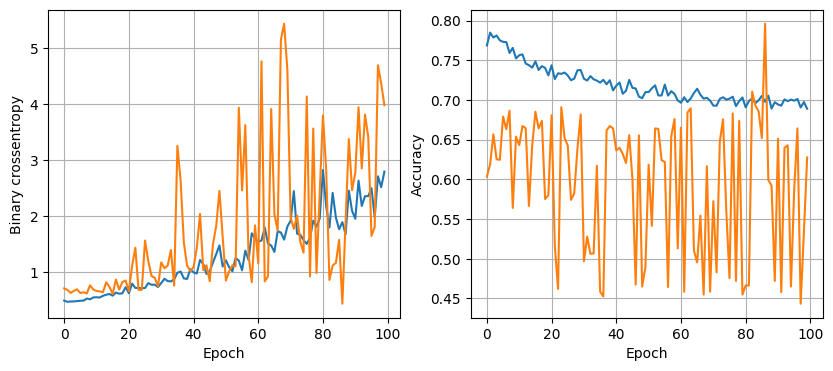

119/119 [==============================] - 0s 4ms/step - loss: 3.2302 - accuracy: 0.7284
16 nodes, dropout 0, lr 0.001, batch size 64


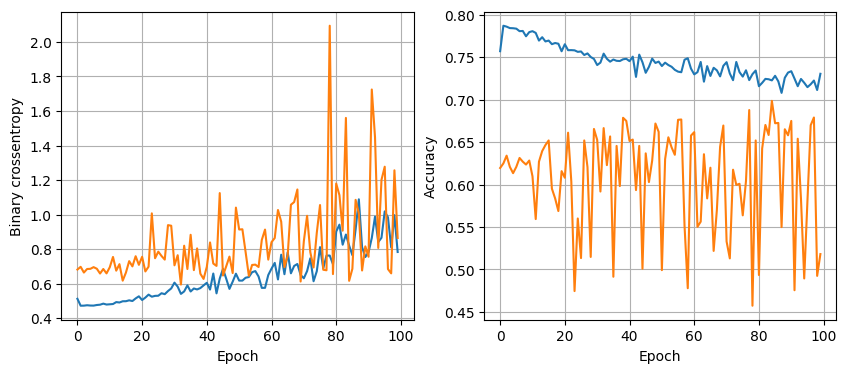

119/119 [==============================] - 1s 4ms/step - loss: 0.7234 - accuracy: 0.6817
16 nodes, dropout 0, lr 0.001, batch size 128


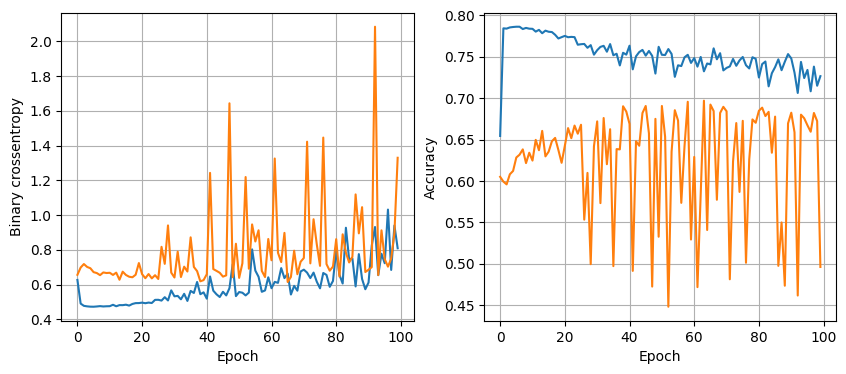

119/119 [==============================] - 1s 4ms/step - loss: 0.9131 - accuracy: 0.6735
16 nodes, dropout 0.2, lr 0.01, batch size 32


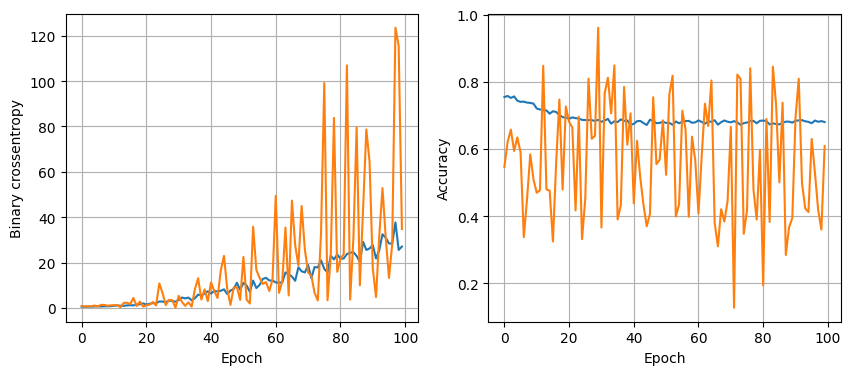

119/119 [==============================] - 0s 4ms/step - loss: 22.9374 - accuracy: 0.7455
16 nodes, dropout 0.2, lr 0.01, batch size 64


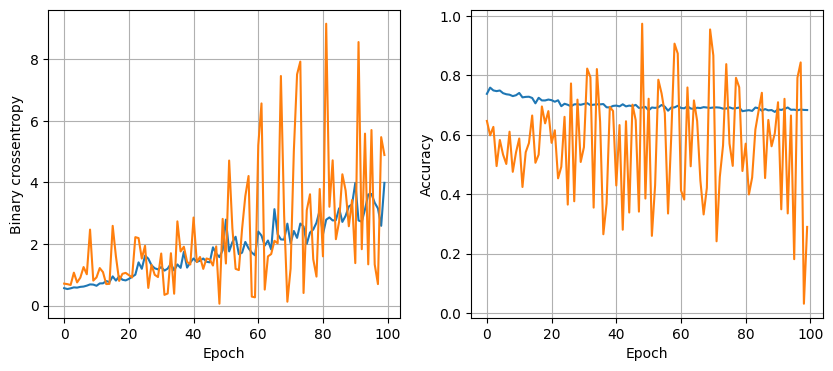

119/119 [==============================] - 1s 4ms/step - loss: 1.7134 - accuracy: 0.7274
16 nodes, dropout 0.2, lr 0.01, batch size 128


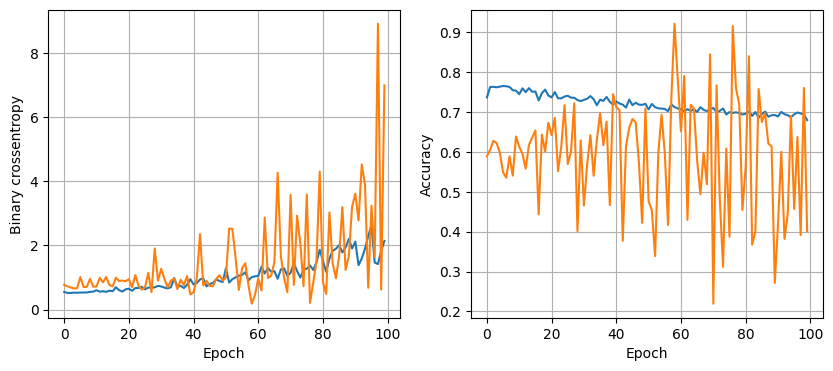

119/119 [==============================] - 1s 4ms/step - loss: 2.7077 - accuracy: 0.7366
16 nodes, dropout 0.2, lr 0.005, batch size 32


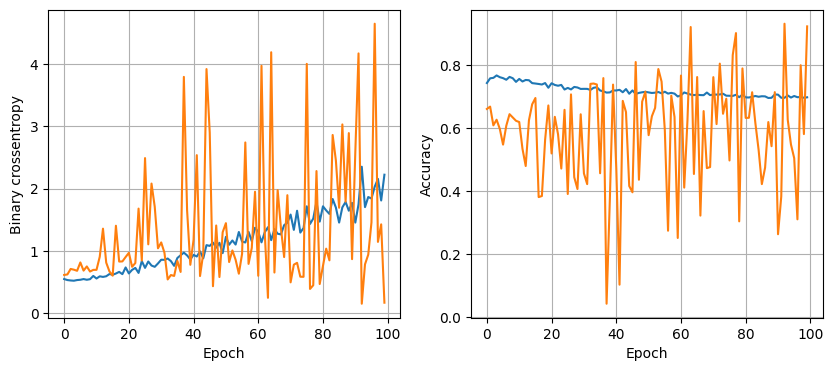

119/119 [==============================] - 0s 4ms/step - loss: 1.1429 - accuracy: 0.6748
16 nodes, dropout 0.2, lr 0.005, batch size 64


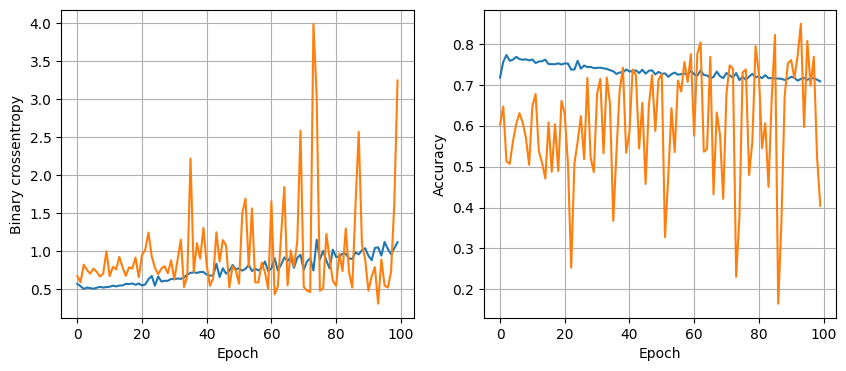

119/119 [==============================] - 1s 4ms/step - loss: 1.2781 - accuracy: 0.7174
16 nodes, dropout 0.2, lr 0.005, batch size 128


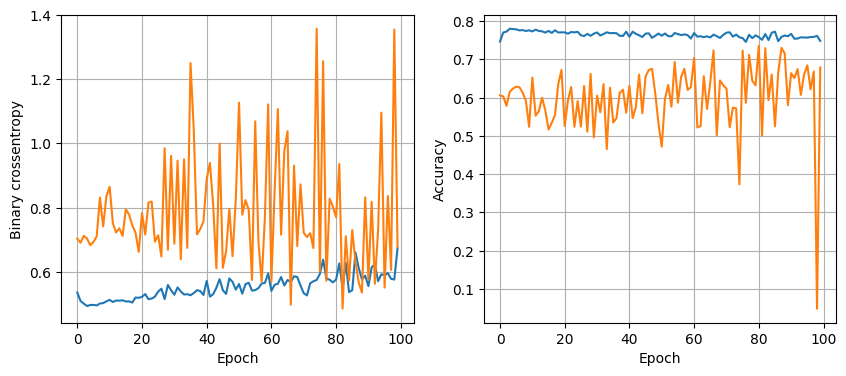

119/119 [==============================] - 1s 4ms/step - loss: 0.5456 - accuracy: 0.7763
16 nodes, dropout 0.2, lr 0.001, batch size 32


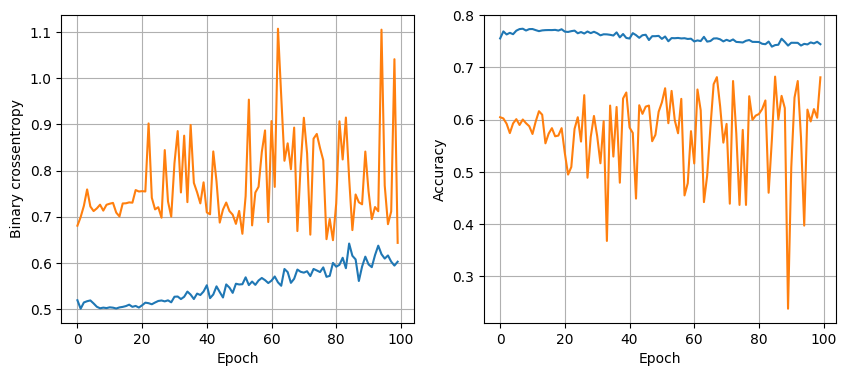

119/119 [==============================] - 0s 4ms/step - loss: 0.6032 - accuracy: 0.7497
16 nodes, dropout 0.2, lr 0.001, batch size 64


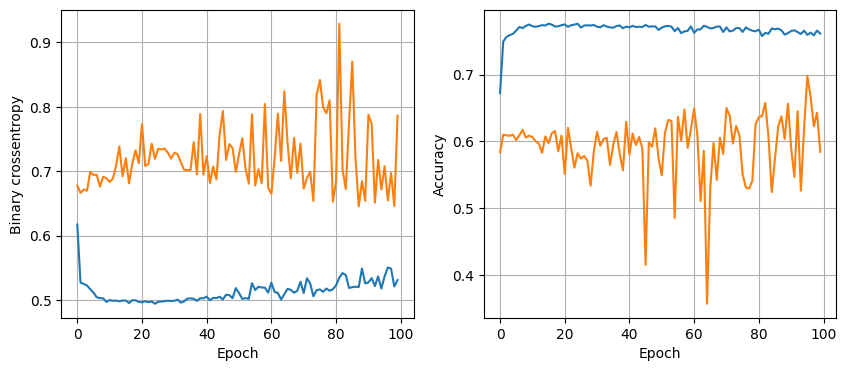

119/119 [==============================] - 1s 4ms/step - loss: 0.4675 - accuracy: 0.7921
16 nodes, dropout 0.2, lr 0.001, batch size 128


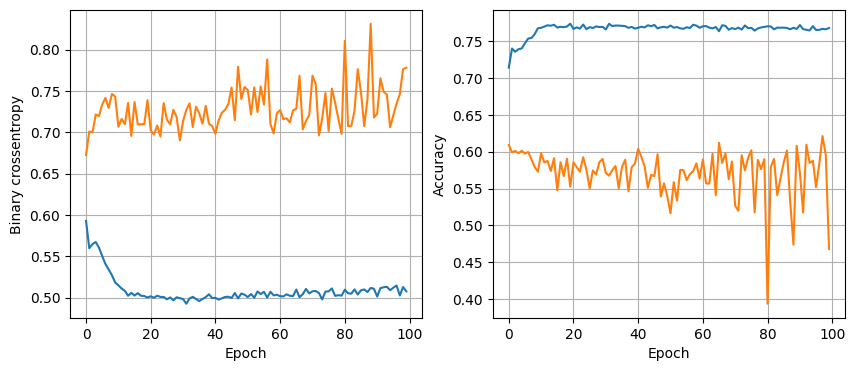

119/119 [==============================] - 1s 4ms/step - loss: 0.4942 - accuracy: 0.7905
32 nodes, dropout 0, lr 0.01, batch size 32


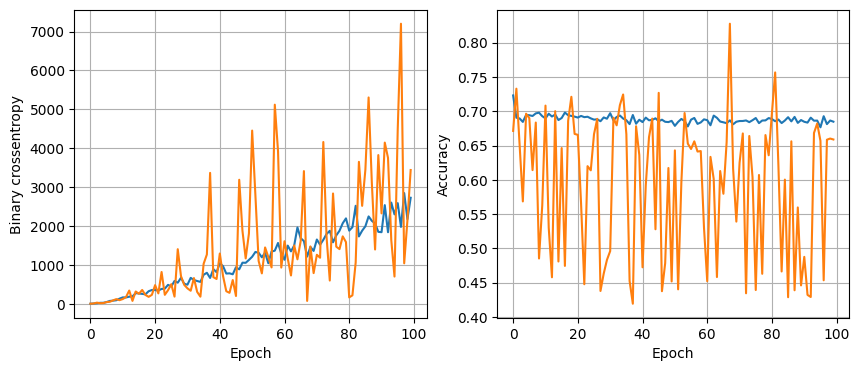

119/119 [==============================] - 0s 4ms/step - loss: 3889.8123 - accuracy: 0.6893
32 nodes, dropout 0, lr 0.01, batch size 64


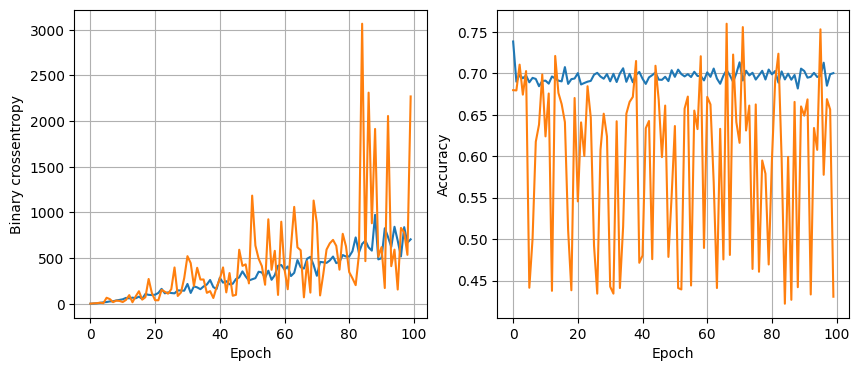

119/119 [==============================] - 1s 4ms/step - loss: 1405.9130 - accuracy: 0.6144
32 nodes, dropout 0, lr 0.01, batch size 128


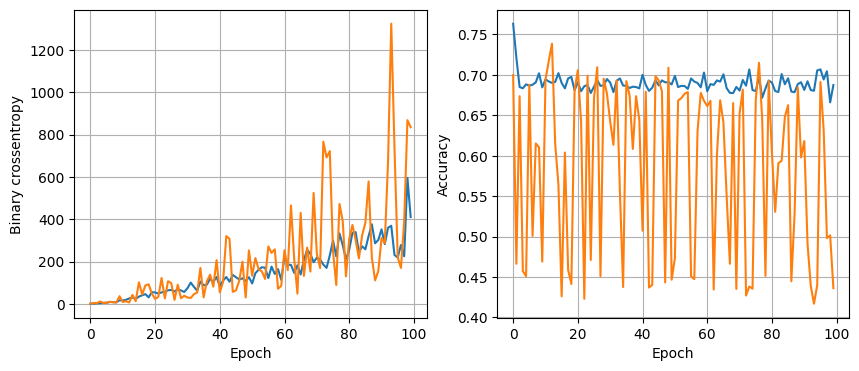

119/119 [==============================] - 1s 4ms/step - loss: 477.5789 - accuracy: 0.6328
32 nodes, dropout 0, lr 0.005, batch size 32


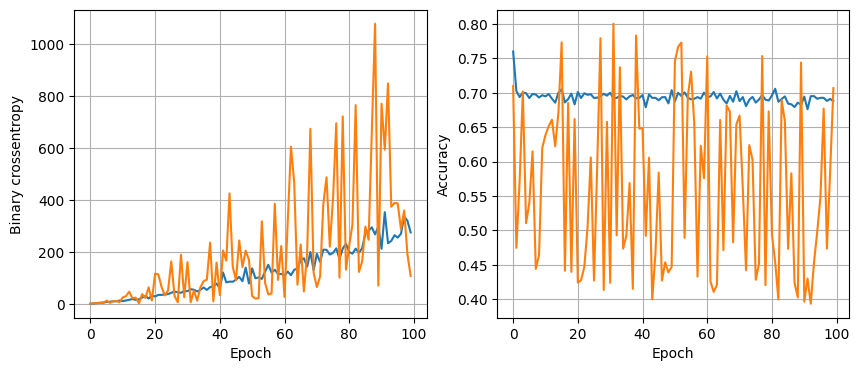

119/119 [==============================] - 1s 4ms/step - loss: 251.3315 - accuracy: 0.5302
32 nodes, dropout 0, lr 0.005, batch size 64


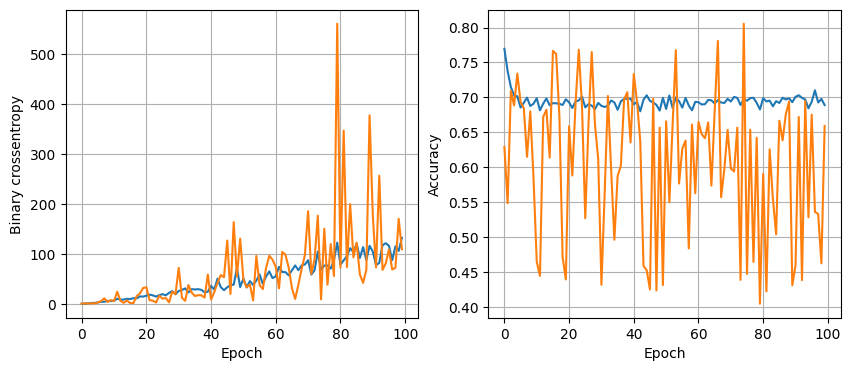

119/119 [==============================] - 1s 4ms/step - loss: 107.2222 - accuracy: 0.7234
32 nodes, dropout 0, lr 0.005, batch size 128


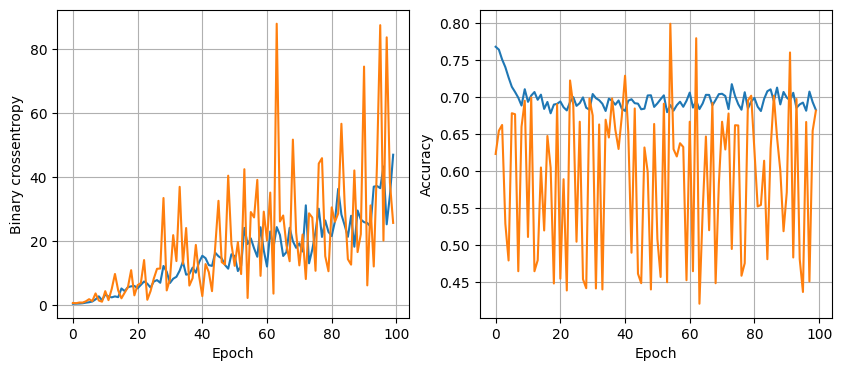

119/119 [==============================] - 1s 4ms/step - loss: 26.8439 - accuracy: 0.7353
32 nodes, dropout 0, lr 0.001, batch size 32


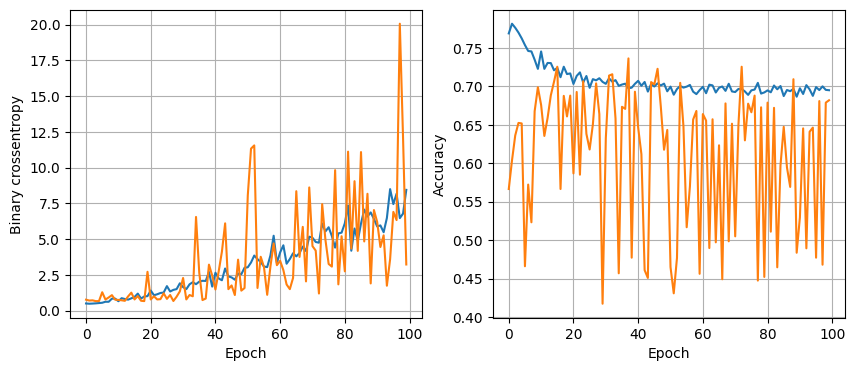

119/119 [==============================] - 0s 4ms/step - loss: 5.6268 - accuracy: 0.6343
32 nodes, dropout 0, lr 0.001, batch size 64


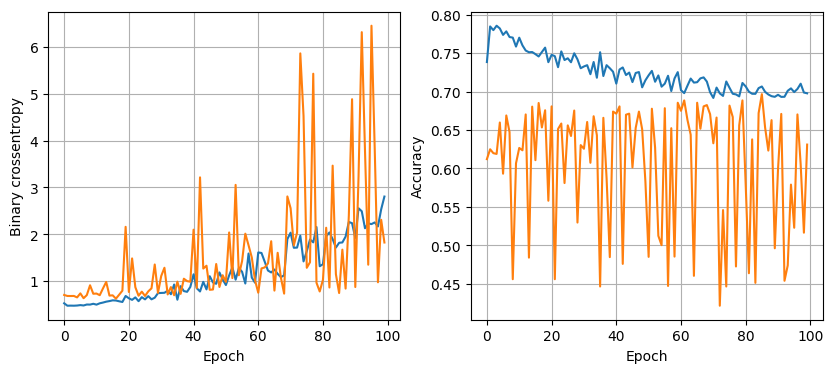

119/119 [==============================] - 1s 4ms/step - loss: 1.0630 - accuracy: 0.7881
32 nodes, dropout 0, lr 0.001, batch size 128


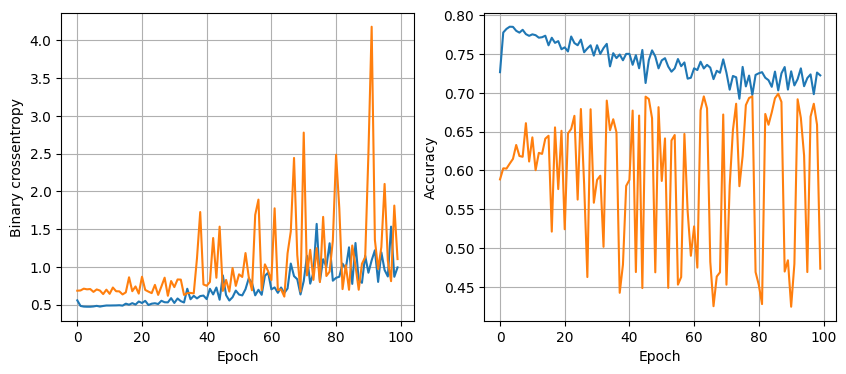

119/119 [==============================] - 1s 4ms/step - loss: 0.6789 - accuracy: 0.7074
32 nodes, dropout 0.2, lr 0.01, batch size 32


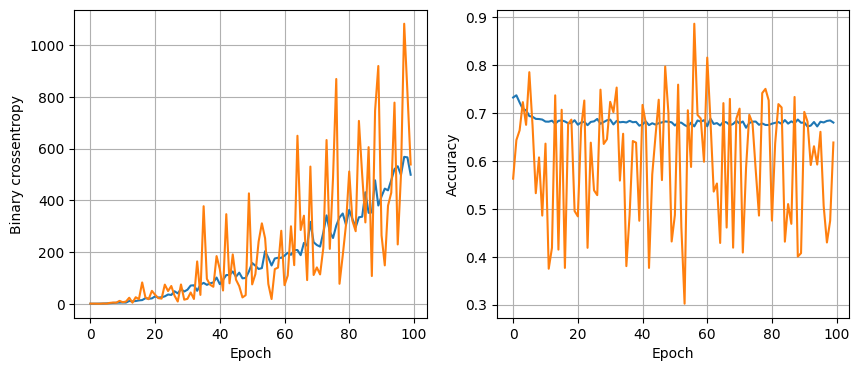

119/119 [==============================] - 0s 4ms/step - loss: 439.9075 - accuracy: 0.7219
32 nodes, dropout 0.2, lr 0.01, batch size 64


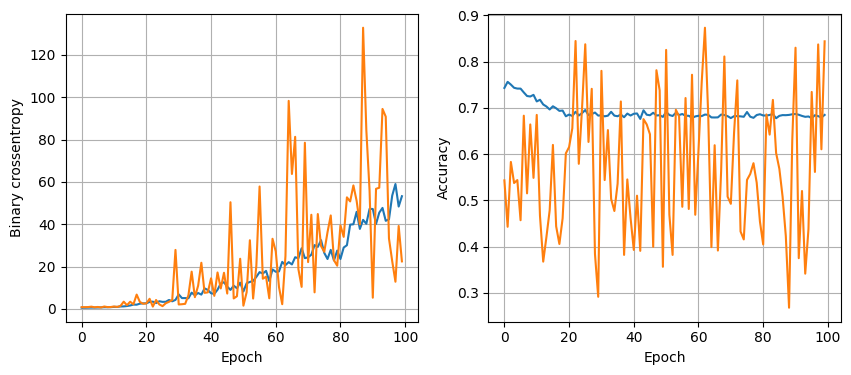

119/119 [==============================] - 1s 4ms/step - loss: 58.4299 - accuracy: 0.4064
32 nodes, dropout 0.2, lr 0.01, batch size 128


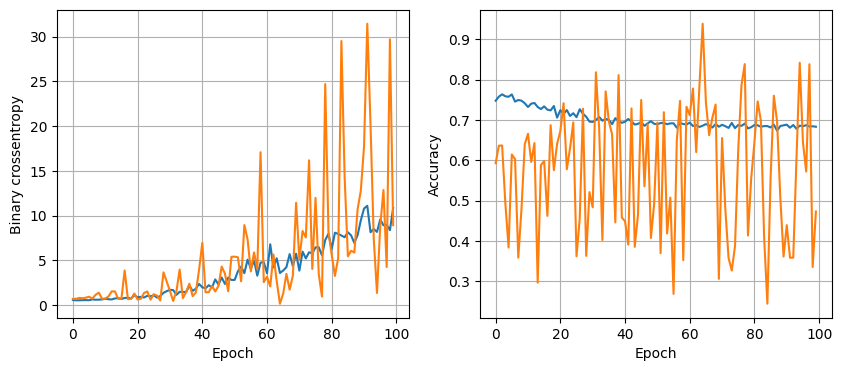

119/119 [==============================] - 1s 4ms/step - loss: 4.4595 - accuracy: 0.7001
32 nodes, dropout 0.2, lr 0.005, batch size 32


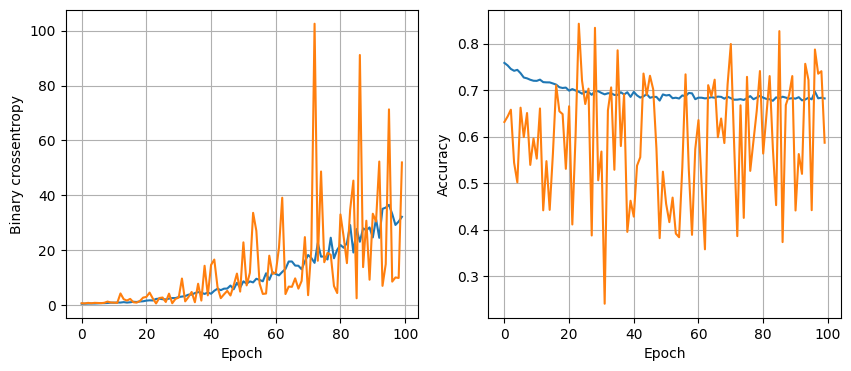

119/119 [==============================] - 1s 4ms/step - loss: 37.4057 - accuracy: 0.7032
32 nodes, dropout 0.2, lr 0.005, batch size 64


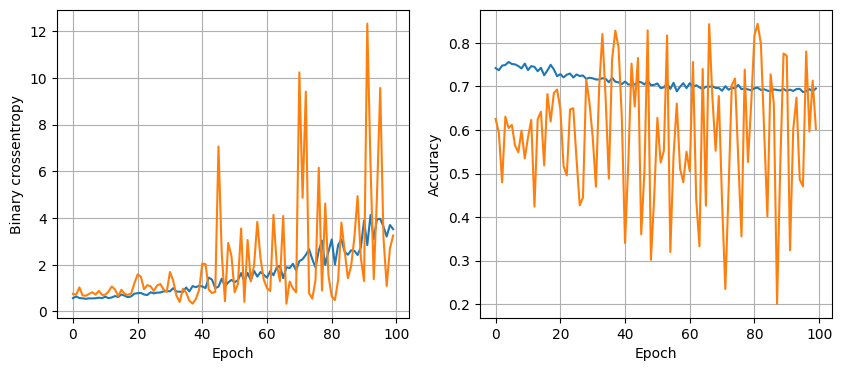

119/119 [==============================] - 1s 4ms/step - loss: 2.5520 - accuracy: 0.7232
32 nodes, dropout 0.2, lr 0.005, batch size 128


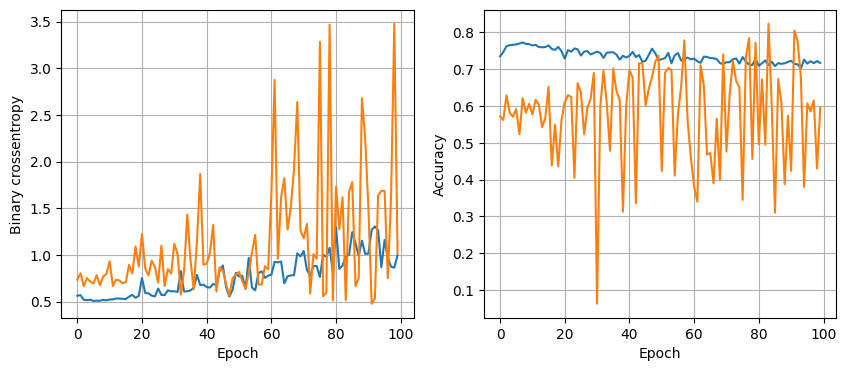

119/119 [==============================] - 1s 4ms/step - loss: 0.5532 - accuracy: 0.7658
32 nodes, dropout 0.2, lr 0.001, batch size 32


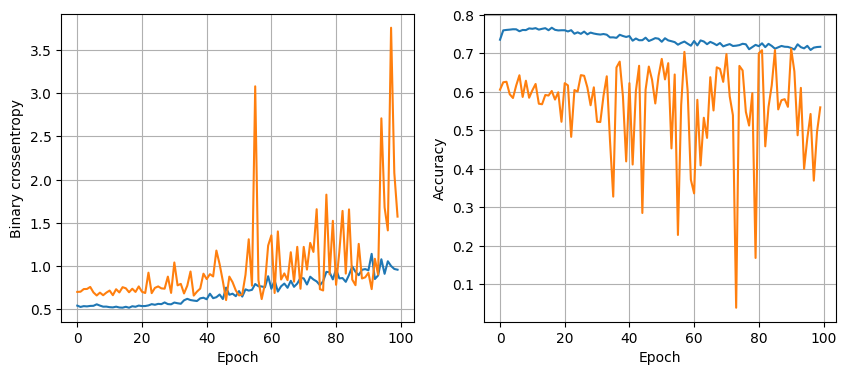

119/119 [==============================] - 0s 4ms/step - loss: 1.0870 - accuracy: 0.6759
32 nodes, dropout 0.2, lr 0.001, batch size 64


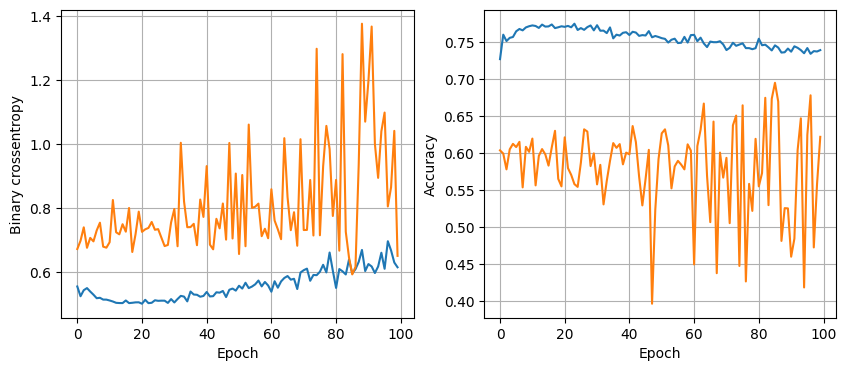

119/119 [==============================] - 1s 4ms/step - loss: 0.5406 - accuracy: 0.7321
32 nodes, dropout 0.2, lr 0.001, batch size 128


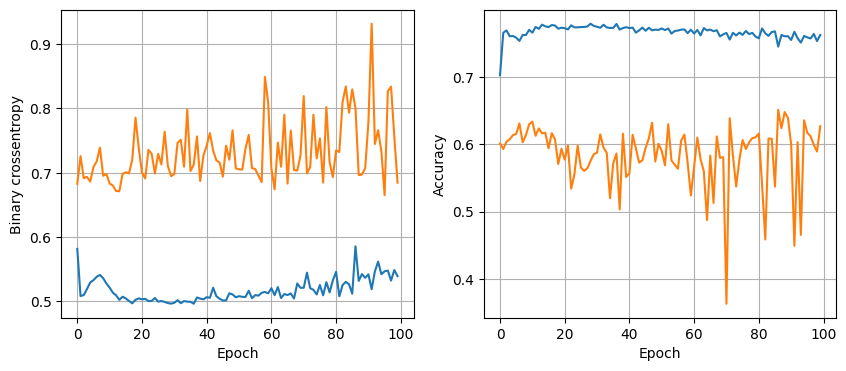

119/119 [==============================] - 1s 4ms/step - loss: 0.5453 - accuracy: 0.7479
64 nodes, dropout 0, lr 0.01, batch size 32


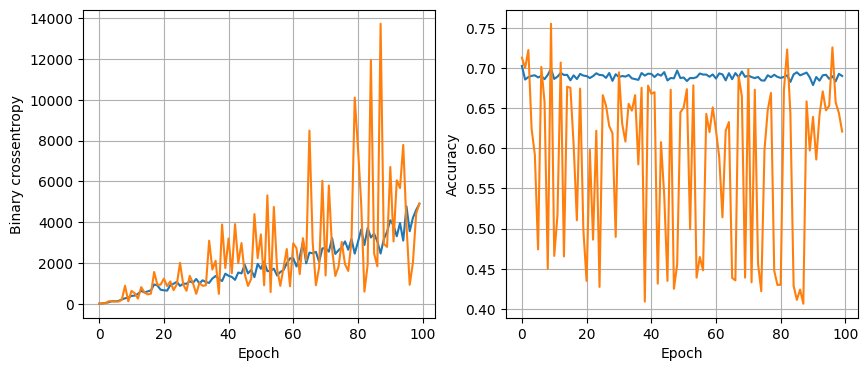

119/119 [==============================] - 1s 4ms/step - loss: 3717.5698 - accuracy: 0.7424
64 nodes, dropout 0, lr 0.01, batch size 64


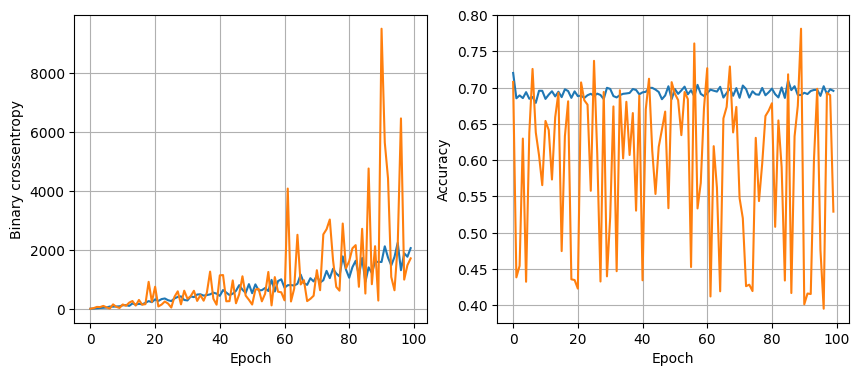

119/119 [==============================] - 1s 4ms/step - loss: 694.0154 - accuracy: 0.7702
64 nodes, dropout 0, lr 0.01, batch size 128


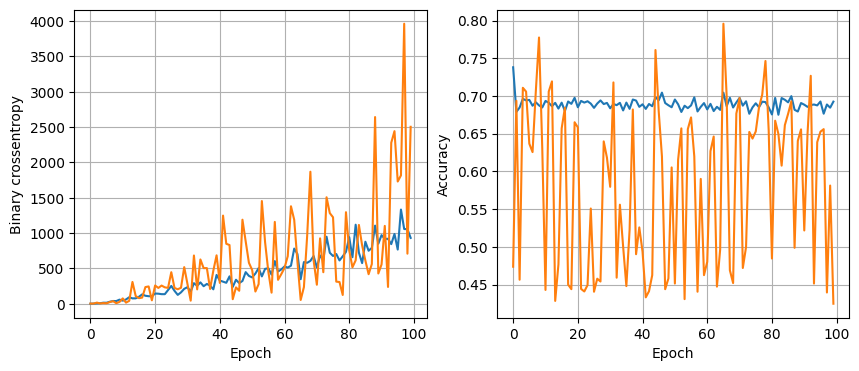

119/119 [==============================] - 1s 4ms/step - loss: 2417.1116 - accuracy: 0.5239
64 nodes, dropout 0, lr 0.005, batch size 32


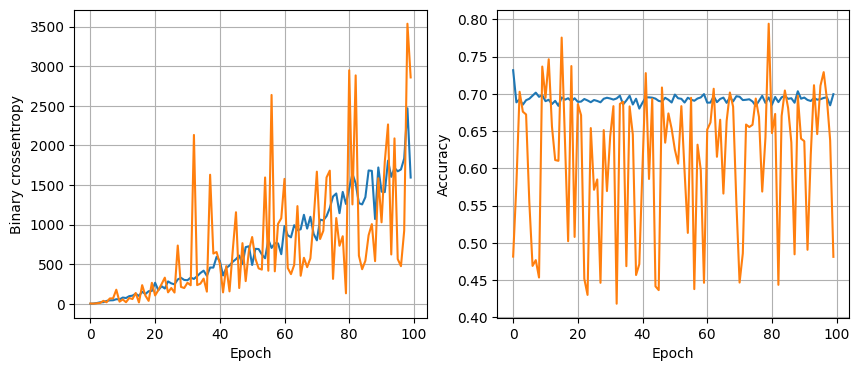

119/119 [==============================] - 1s 4ms/step - loss: 1071.7322 - accuracy: 0.7758
64 nodes, dropout 0, lr 0.005, batch size 64


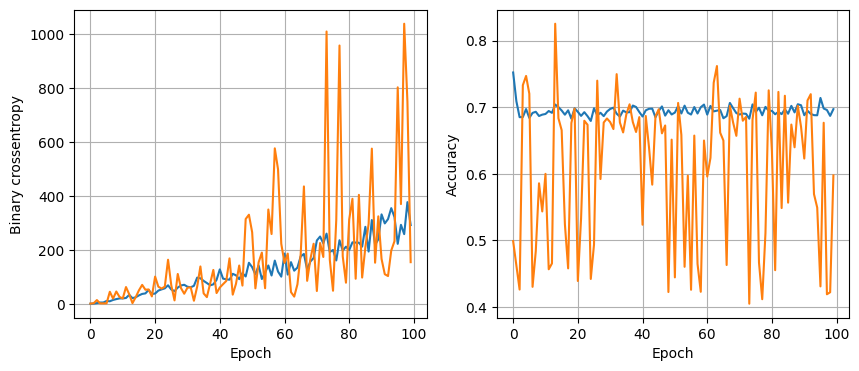

119/119 [==============================] - 1s 4ms/step - loss: 202.1210 - accuracy: 0.6401
64 nodes, dropout 0, lr 0.005, batch size 128


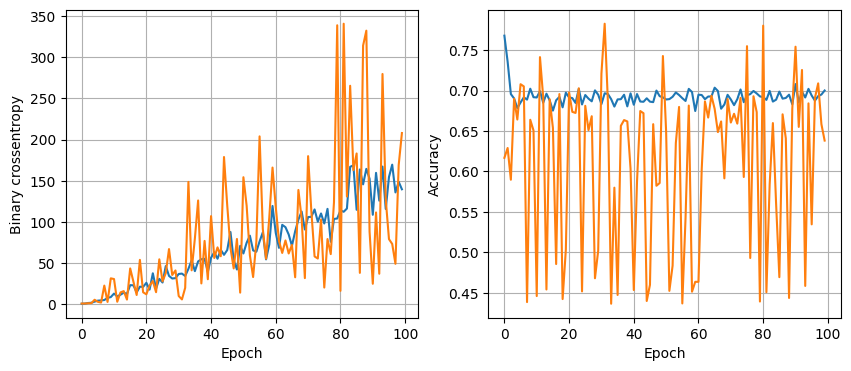

119/119 [==============================] - 1s 4ms/step - loss: 158.1338 - accuracy: 0.7445
64 nodes, dropout 0, lr 0.001, batch size 32


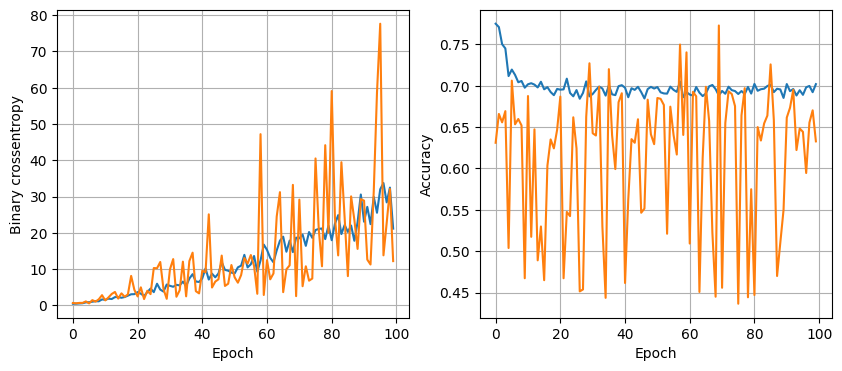

119/119 [==============================] - 1s 4ms/step - loss: 6.4730 - accuracy: 0.7773
64 nodes, dropout 0, lr 0.001, batch size 64


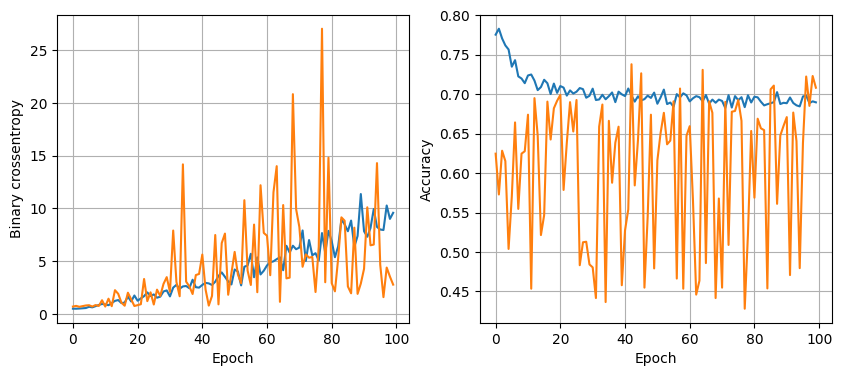

119/119 [==============================] - 1s 4ms/step - loss: 2.7675 - accuracy: 0.7684
64 nodes, dropout 0, lr 0.001, batch size 128


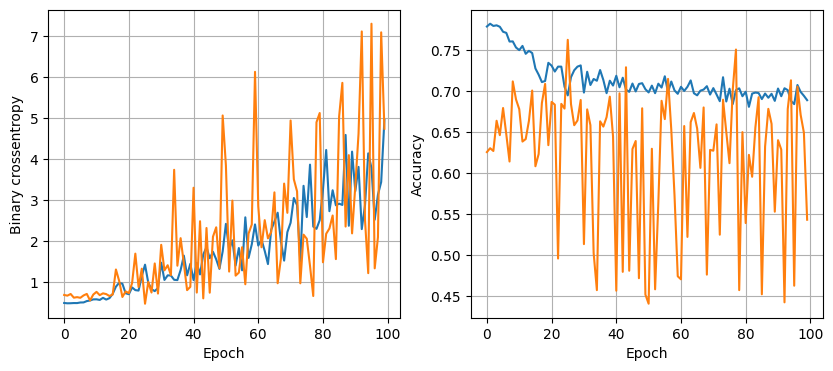

119/119 [==============================] - 1s 4ms/step - loss: 1.9352 - accuracy: 0.7852
64 nodes, dropout 0.2, lr 0.01, batch size 32


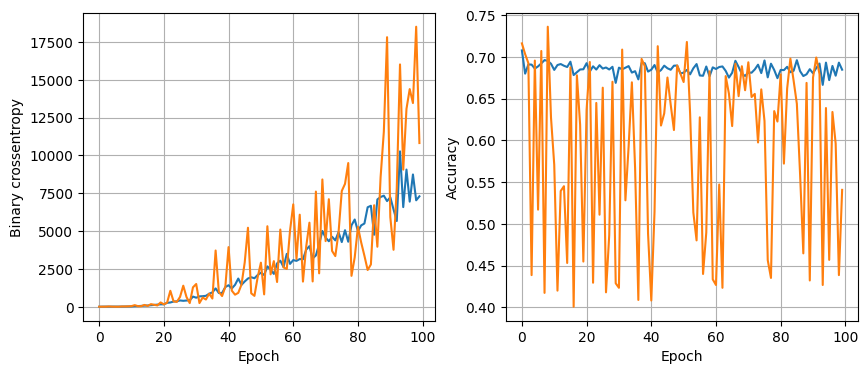

119/119 [==============================] - 1s 4ms/step - loss: 5519.1147 - accuracy: 0.7503
64 nodes, dropout 0.2, lr 0.01, batch size 64


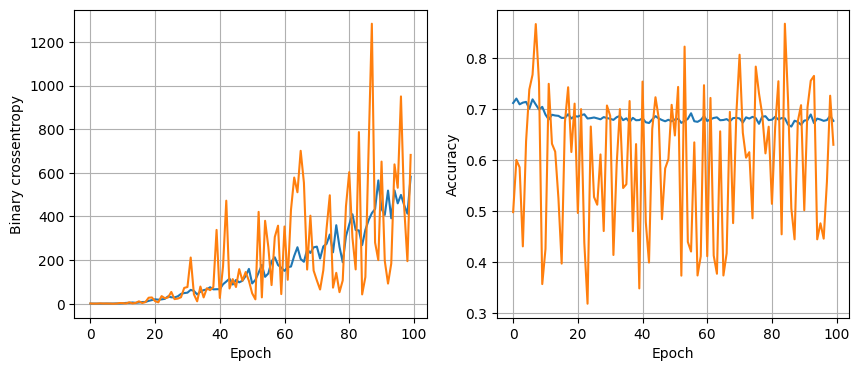

119/119 [==============================] - 1s 5ms/step - loss: 581.5361 - accuracy: 0.7056
64 nodes, dropout 0.2, lr 0.01, batch size 128


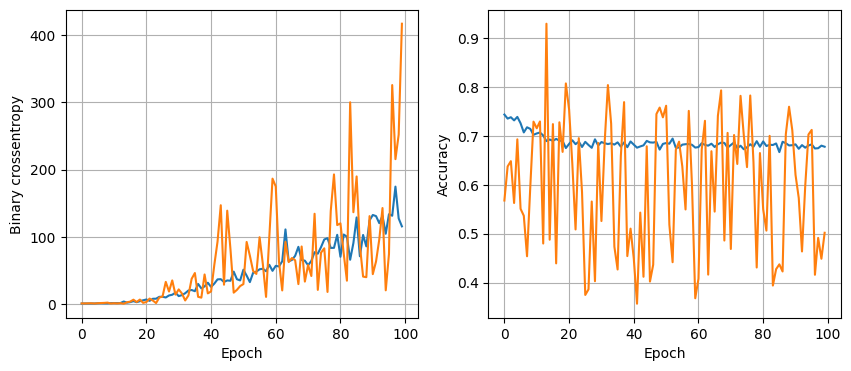

119/119 [==============================] - 1s 4ms/step - loss: 207.4771 - accuracy: 0.7095
64 nodes, dropout 0.2, lr 0.005, batch size 32


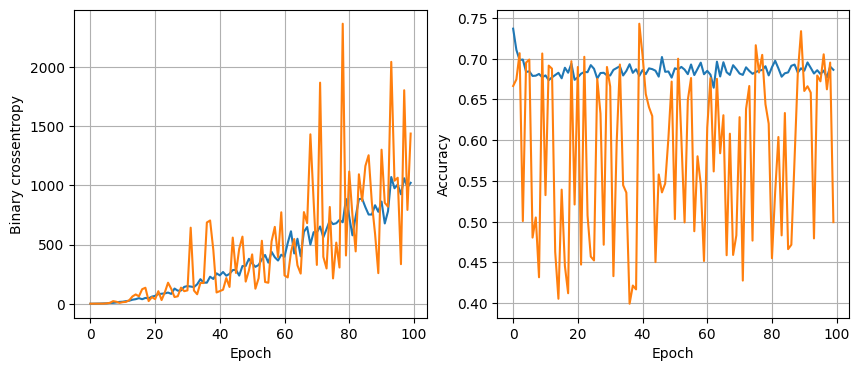

119/119 [==============================] - 1s 4ms/step - loss: 626.8495 - accuracy: 0.7521
64 nodes, dropout 0.2, lr 0.005, batch size 64


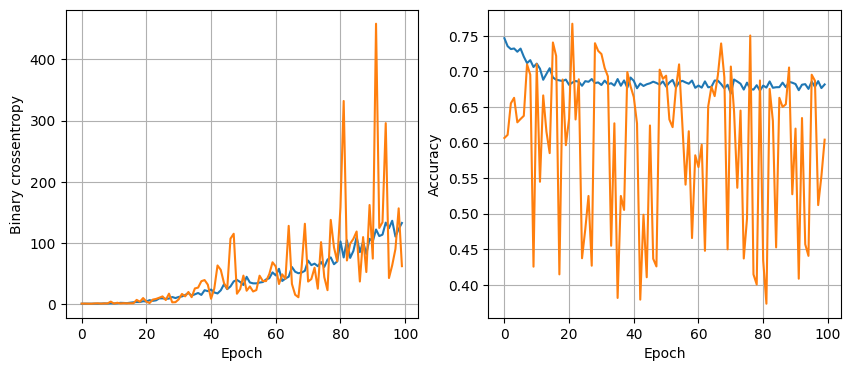

119/119 [==============================] - 1s 4ms/step - loss: 35.7652 - accuracy: 0.7355
64 nodes, dropout 0.2, lr 0.005, batch size 128


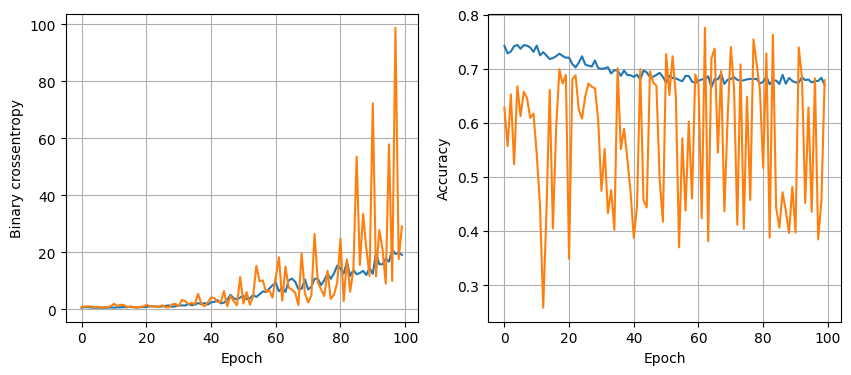

119/119 [==============================] - 1s 4ms/step - loss: 30.5947 - accuracy: 0.6887
64 nodes, dropout 0.2, lr 0.001, batch size 32


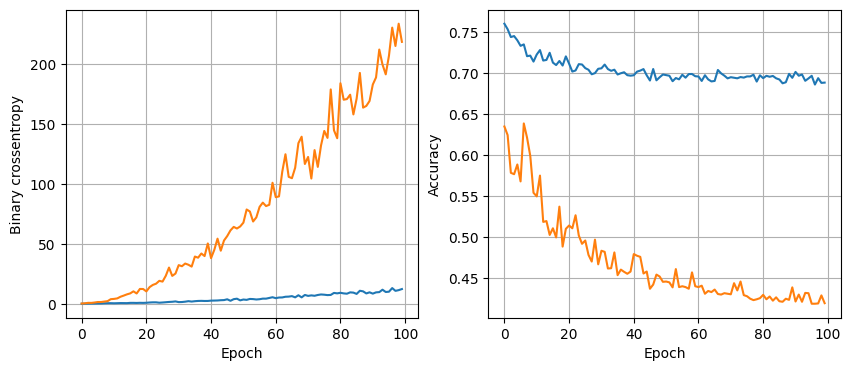

119/119 [==============================] - 0s 4ms/step - loss: 84.9443 - accuracy: 0.7458
64 nodes, dropout 0.2, lr 0.001, batch size 64


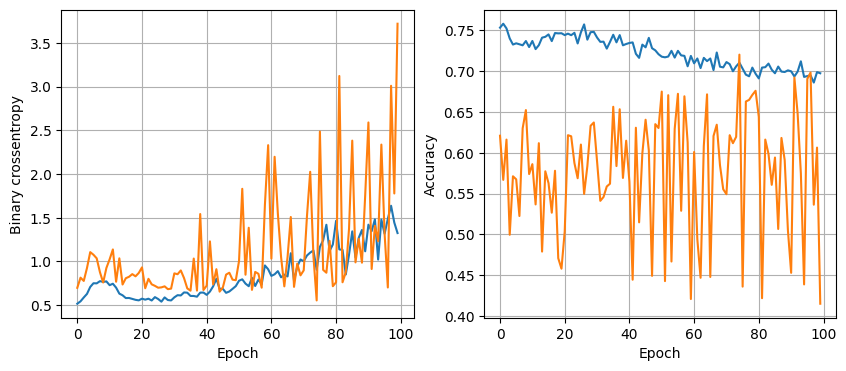

119/119 [==============================] - 1s 5ms/step - loss: 1.5099 - accuracy: 0.7390
64 nodes, dropout 0.2, lr 0.001, batch size 128


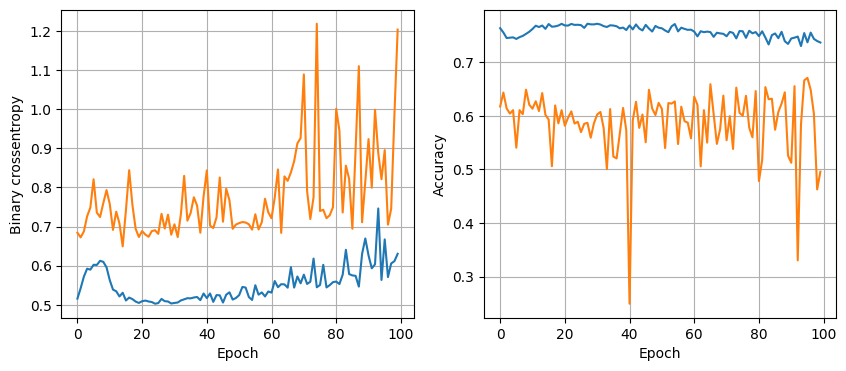

119/119 [==============================] - 1s 4ms/step - loss: 0.7242 - accuracy: 0.6811


In [60]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, Y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [61]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [62]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.58      0.66      1370
           1       0.79      0.90      0.84      2434

    accuracy                           0.78      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.78      0.78      0.78      3804

